# Principal Compontent Analysis 
## (PCA) Reducción de dimenciones

Al tener muchas variables/caracteristicas/dimensiones en nuestros datos, por lo general en la mayoría de los casos mientras más información mejores resultados daría nuestra predicción, ya que toma en cuenta muchas caracteristicas para dar el mejor de los resultados correctos.  
Sin embargo esto no siempre es así, ya que si tenemos un sin fin de features, puede significar que gran aprte de estas variables no son tan importantes como otras, y no aporten valor de predicción, además de esto podriamos estar llegando al overfitting.  

Existen 2 formas de reducir las dimensiones de nuestro dataframe:  
1. Eliminar por completo las dimensiones:  
    + Al eliminar algunas dimensiones debemos tener la certeza en que quitamos dimensiones poco importantes.  
2. Extracción de caracteristicas:
    + Si tenemos 10 caracteristicas crearemos otras 10 nuevas que serán la combinación de las 10 anteriores. Ordenandolas de mejor a peor, siendo estas necesarias para predecir una variable dependiente.  
### ¿Qué es PCA?  
Es una tecnica de extracción de dimensiones/features donde combinamos entradas de una manera específica y podemos eliminar algunas variables "menos importantes" 

### ¿Cómo funciona PCA?
+ Normalización de Variables
+ Obtiene Autovectores y Autovalores
+ Ordena Autovalores de mayor a menor y elije los "k" más grandes de los Autovectores
+ Crea la patriz de proyección W con los "k" de los Autovectores seleccionados
+ Transformamos el dataset original con la matriz de proyección para obtener nuevas caracteristicas k-dimensionales  

### Metodos para elegir componentes principales  
+ Método 1: Elegimos arbitrariamente “las primeras n dimensiones” (las más importantes). Por ejemplo si lo que queremos es poder graficar en 2 dimensiones, podríamos tomar las 2 características nuevas y usarlas como los ejes X e Y.  

+ Método 2: calcular la “proporción de variación explicada“ de cada característica  e ir tomando dimensiones hasta alcanzar un mínimo que nos propongamos, por ejemplo hasta alcanzar a explicar el 85% de la variabilidad total.  

+ Método 3: Crear una gráfica especial llamada scree plot -a partir del Método 2- y seleccionar cuántas dimensiones usaremos por el método “del codo” en donde identificamos visualmente el punto en donde se produce una caída significativa en la variación explicada relativa a la característica anterior.  

## Ejemplo en Python

In [10]:
#Importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [11]:
#Cargamos los datos de entrada
dataframe = pd.read_csv(r'comprar_alquilar.csv')
dataframe.tail(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
192,4653,1024,447,703,16952,392957,0,0,3,0
193,3390,881,194,584,34601,304112,2,2,5,0
194,2969,623,72,620,29663,289205,2,2,6,0
195,4169,1292,48,333,28503,239872,2,1,7,1
196,4054,1095,371,440,22183,223971,1,0,3,0
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


In [12]:
#Normalizamos los datos
scaler = StandardScaler()
df = dataframe.drop(['comprar'],axis=1)#Quitamos la variable a predecir
scaler.fit(df)#Adaptamos los datos para transformarlos
xScaled=scaler.transform(df)#Escalamos los datos y los noramlizamos



In [13]:
#Instanciamos el objeto PCA y aplicamos
n = len(df.columns) #obtenemos el numero de columnas nuevas
pca = PCA(n_components=n) #inicializamos el reductor de dimensiones
pca.fit(xScaled) #Obtenemos los elementos principales
xPca = pca.transform(xScaled) #Creamos nuevas dimensiones de PCA

In [14]:
print('Dimensiones de xPca',xPca.shape)
expl=pca.explained_variance_ratio_
print(expl)
print('SumaExplain',sum(expl[0:5]))
#Con 5 componentes nos da un 85% de varianza explicada

Dimensiones de xPca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
SumaExplain 0.852406211771431


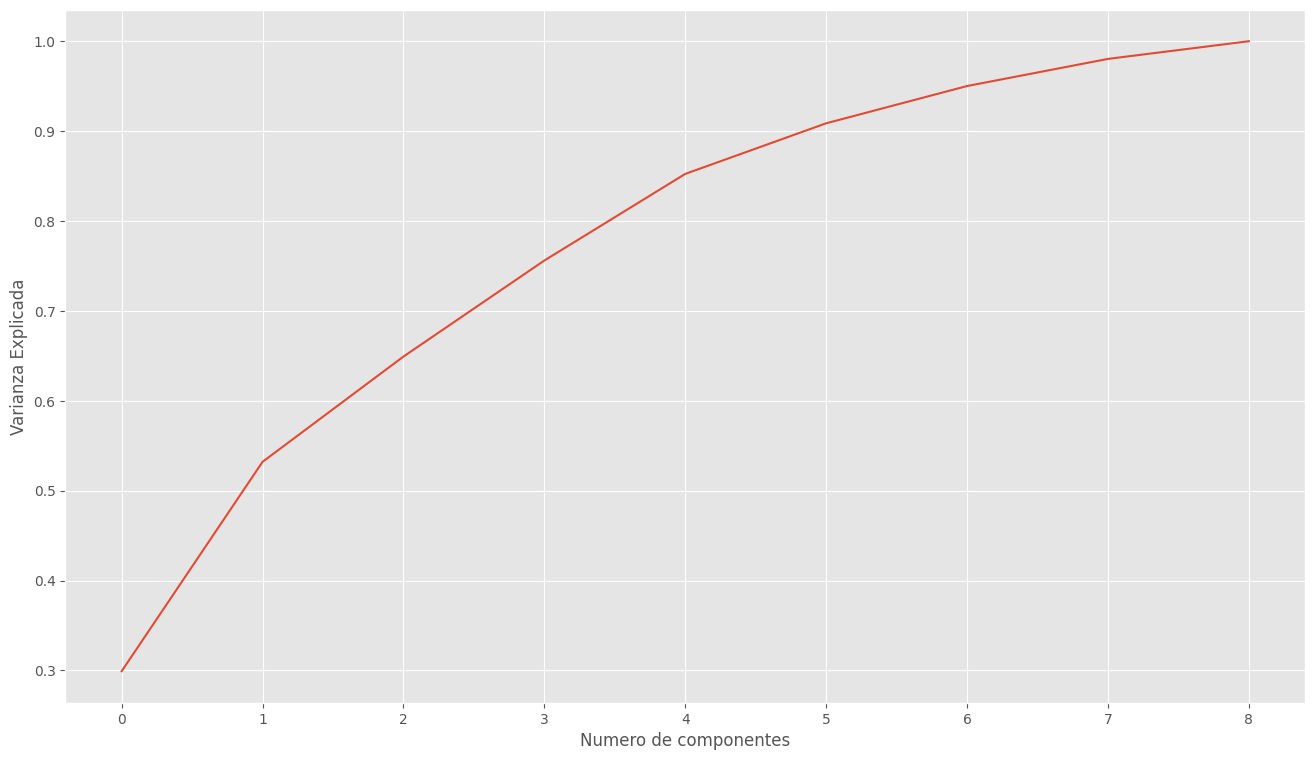

In [15]:
#Graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza Explicada')
plt.show()

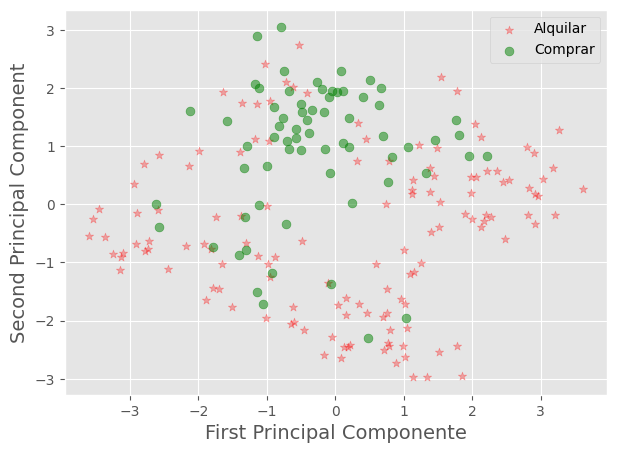

In [20]:
#Graficamos en 2 dimensiones los 2 primeros componentes
xAx = xPca[:,0]
yAx = xPca[:,1]
labels = dataframe['comprar'].values
cdict = {0:'red',1:'green'}
labl = {0:'Alquilar',1:'Comprar'}
marker = {0:'*',1:'o'}
alpha = {0:.3,1:.5}
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(xAx[ix], yAx[ix], c=cdict[l], label = labl[l], s=40, marker=marker[l], alpha=alpha[l])

plt.xlabel('First Principal Componente',fontsize=14)
plt.ylabel('Second Principal Component',fontsize=14)
plt.legend()
plt.show()
